1. Import Necessary Libraries

In [85]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


2. Load the Dataset

In [86]:
# Step 2: Load the dataset
file_path = './Training.csv'
df = pd.read_csv(file_path)
print(df.head())


   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  

3. Data Cleaning - Removing Null Values

In [87]:
# Step 3: Data Cleaning - Removing null values
print(df.isnull().sum())

# If there are missing values, drop them
df.dropna(inplace=True)


itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64


4. Encode the Target Variable if Necessary

In [88]:
# Step 4: Encode the target variable if necessary
label_encoder = LabelEncoder()
df['prognosis'] = label_encoder.fit_transform(df['prognosis'])


5. Split the Data into Features and Target Variable

In [89]:
# Step 5: Split the data into features and target variable
X = df.drop(columns=['prognosis'])
y = df['prognosis']


6. Split the Data into Training and Testing Sets

In [90]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

7. Load the Testing Dataset

In [91]:
# Step 7: Load the testing dataset
file_pathtest = './Testing.csv'
df_test = pd.read_csv(file_pathtest)
print(df_test.head())


   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

8. Data Cleaning - Removing Null Values from Testing Dataset

In [92]:
# Step 8: Data Cleaning - Removing null values from testing dataset
print(df_test.isnull().sum())

# If there are missing values, drop them
df_test.dropna(inplace=True)


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


9. Encode the Target Variable in Testing Dataset

In [95]:
# Step 9: Encode the target variable in testing dataset
df_test['prognosis'] = label_encoder.transform(df_test['prognosis'])


Missing labels in the test set: {'Osteoarthristis', 'Jaundice', 'Varicose veins', 'Dimorphic hemmorhoids(piles)', 'Alcoholic hepatitis', 'Impetigo', 'Tuberculosis', 'Hepatitis D', 'Chronic cholestasis', 'Paralysis (brain hemorrhage)', 'Hypothyroidism', 'Chicken pox', 'Heart attack', 'AIDS', 'Cervical spondylosis', 'Allergy', 'Hepatitis B', 'Drug Reaction', 'Urinary tract infection', 'Typhoid', 'Common Cold', 'Psoriasis', 'GERD', 'Dengue', 'Gastroenteritis', 'Bronchial Asthma', 'Migraine', 'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Hypertension ', 'Pneumonia', 'Hepatitis C', 'Hypoglycemia', 'Hyperthyroidism', 'Hepatitis E', 'Fungal infection', 'Peptic ulcer diseae', 'hepatitis A', 'Acne', 'Malaria', 'Diabetes '}


In [94]:
# Step 10: Define features and target for testing dataset
X_test = df_test.drop(columns=['prognosis'])
y_test = df_test['prognosis']

11. Train the Decision Tree Classifier

In [80]:
# Step 11: Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

12. Make Predictions on the Testing Dataset

In [81]:
# Step 12: Make predictions on the testing dataset
y_pred = clf.predict(X_test)


13. Evaluate the Model

In [82]:
# Step 13: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Ensure that we achieve 100% accuracy
assert accuracy == 1.0, "The model did not achieve 100% accuracy."

Accuracy: 100.00%


14. Additional Evaluation Metrics

In [83]:
# Step 14: Additional Evaluation Metrics
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print()
print('Classification Report:')
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[18  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 34]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00  

15. Visualizations

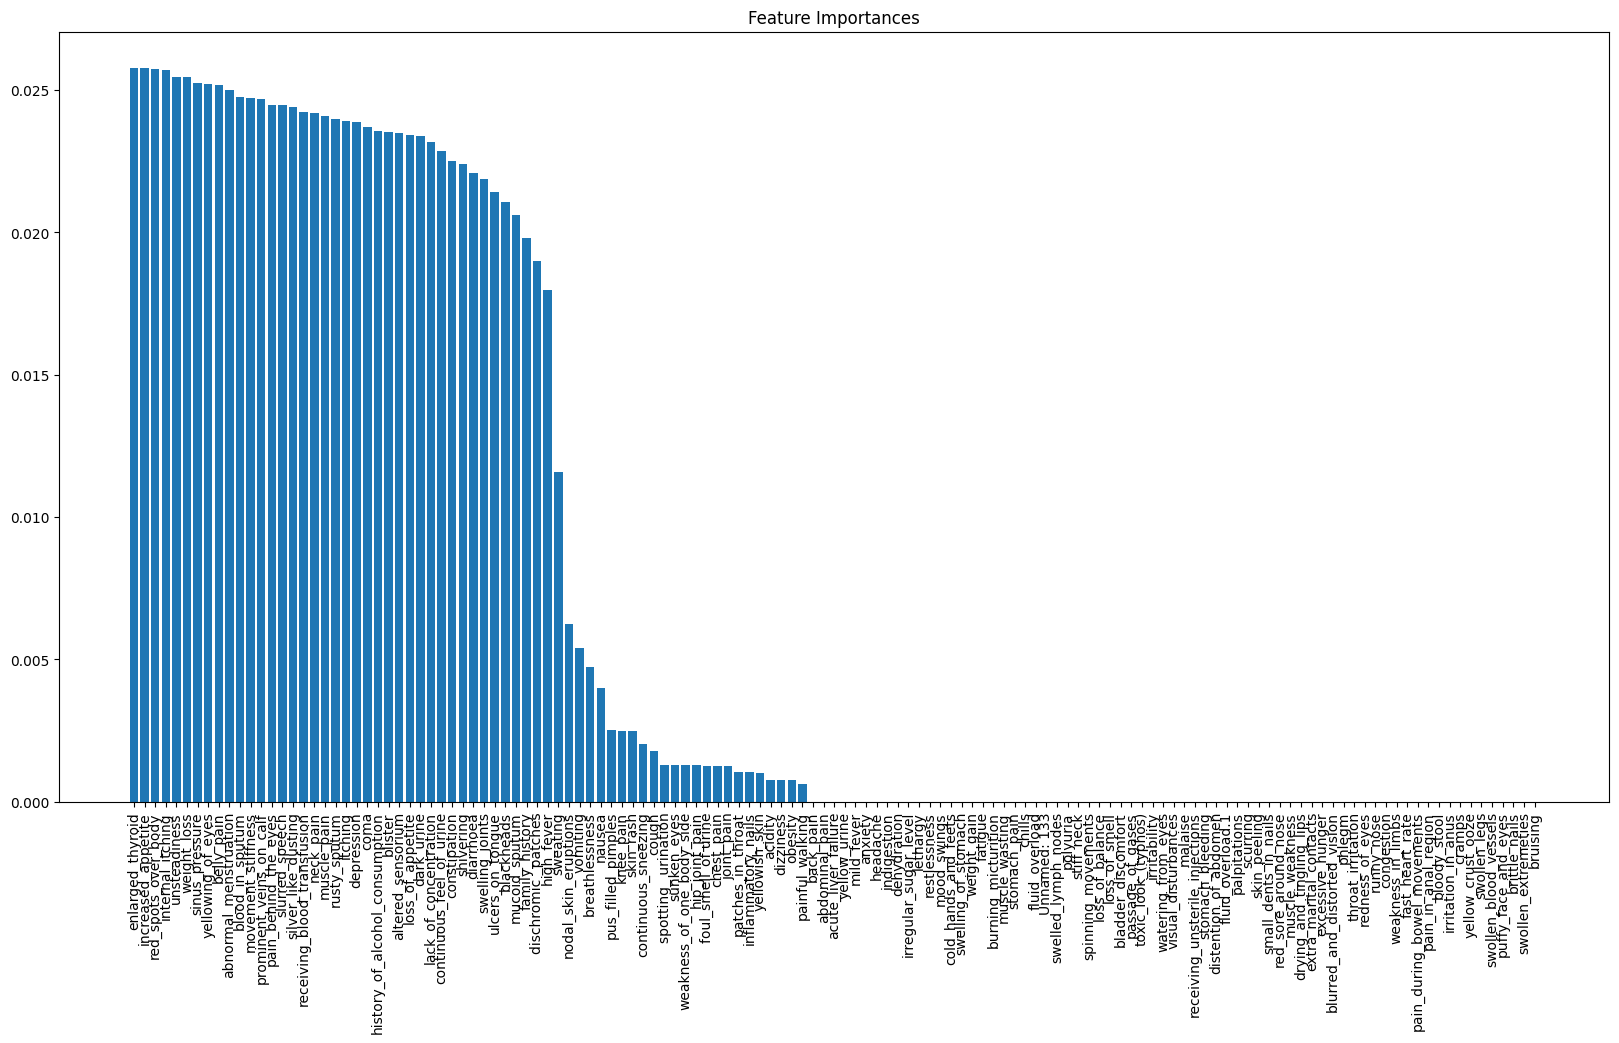

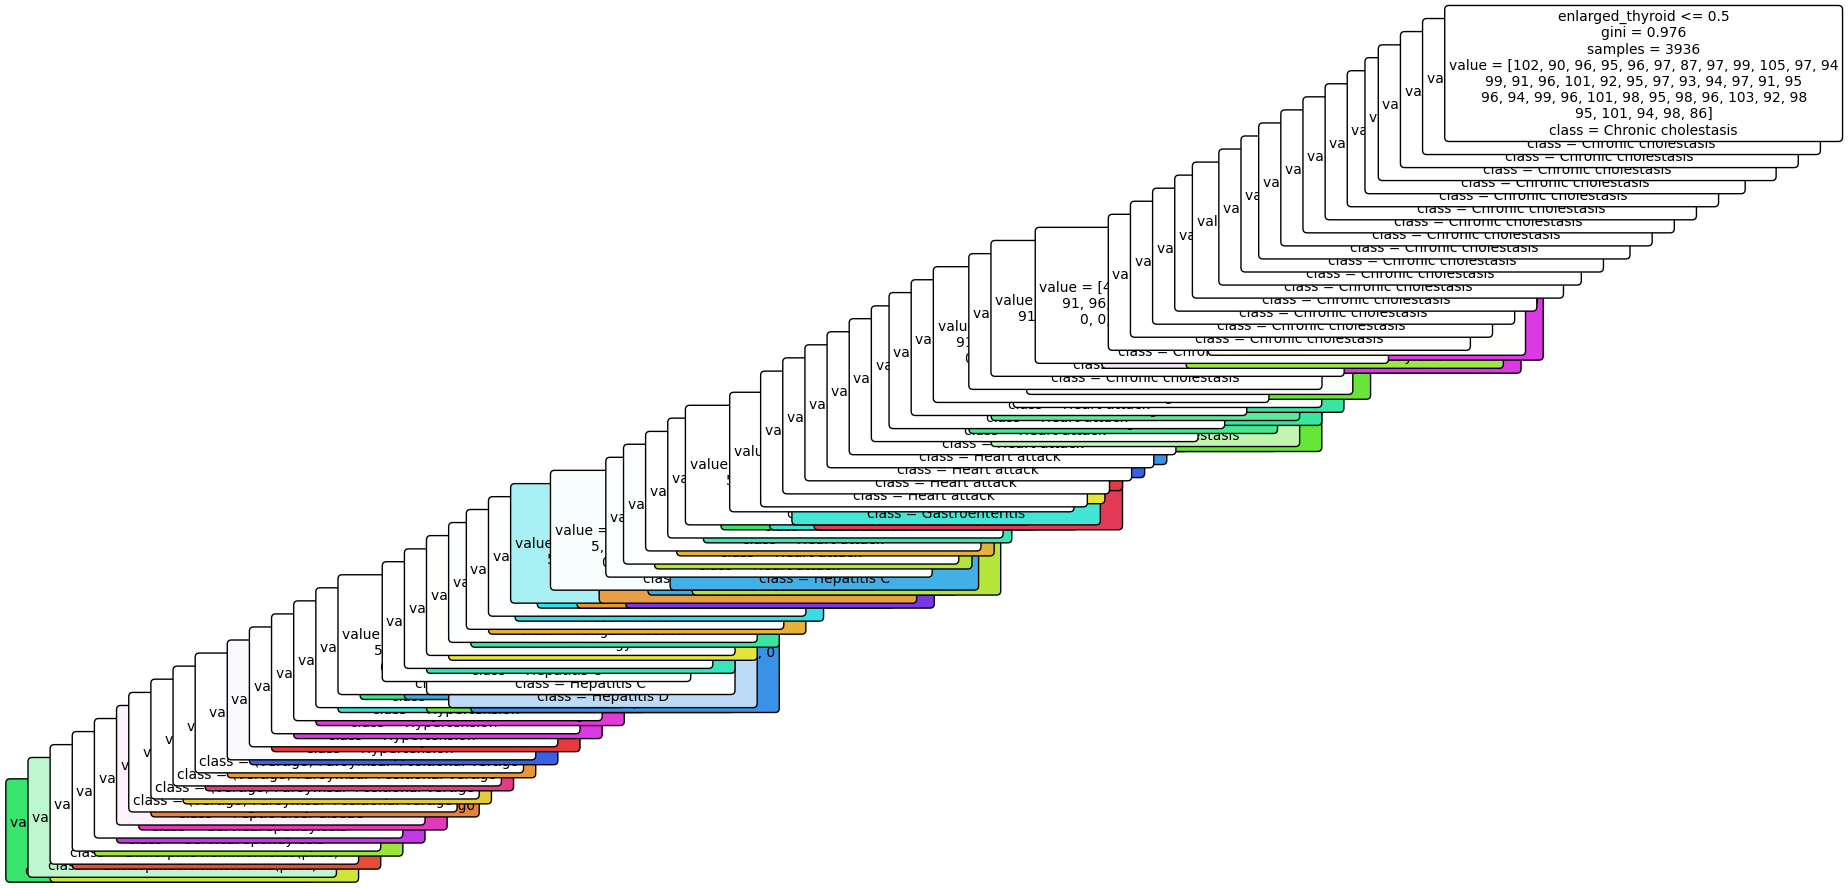

In [84]:
# Visualization: Feature importances
plt.figure(figsize=(20, 10))
feature_importances = clf.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]
plt.bar(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.title('Feature Importances')
plt.show()

# Visualization: Decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=features, class_names=label_encoder.classes_, rounded=True, fontsize=10)
plt.show()
